In [22]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [23]:
data = pd.read_csv("bladder_cancer.csv")
data = data.dropna()
data.isnull().sum()

Amp_1MHz        0
Phase_1MHz      0
Amp_500kHz      0
Phase_500kHz    0
Amp_100kHz      0
Phase_100kHz    0
Amp_50kHz       0
Phase_50kHz     0
Amp_10kHz       0
Phase_10kHz     0
Label           0
dtype: int64

In [24]:

X = data.drop(columns=['Label'], axis=1)
y = data['Label']
train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size = 0.2,random_state=0)

In [25]:
scaler = StandardScaler()
scaler.fit(train_feature)
train_feature_scaled = scaler.transform(train_feature)
test_feature_scaled = scaler.transform(test_feature)

In [26]:
knn = KNeighborsClassifier()
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(train_feature_scaled, train_label)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


In [27]:
best_parameter=grid.best_estimator_
print(grid_search.best_params_)
print("best_score:", grid.best_score_)

{'n_neighbors': 3}
best_score: 0.8198830409356723


In [28]:
predictions_test_set = best_parameter.predict(test_feature_scaled)

accuracy_score(test_label, predictions_test_set)

0.7708333333333334

In [29]:
results_df = pd.DataFrame(grid.cv_results_)
df_mean=results_df['mean_test_score']
df_mean

0     0.814620
1     0.766959
2     0.819883
3     0.735380
4     0.809649
5     0.713743
6     0.761988
7     0.714327
8     0.735673
9     0.714620
10    0.719883
11    0.698246
12    0.708772
13    0.692982
14    0.714327
15    0.687427
16    0.698246
17    0.654678
18    0.671053
19    0.660234
20    0.681579
21    0.654971
22    0.671053
23    0.644444
24    0.665789
25    0.649415
26    0.665789
27    0.638889
28    0.654971
29    0.628070
30    0.644737
31    0.628363
32    0.644737
33    0.622807
34    0.639181
35    0.622807
36    0.628363
37    0.623099
38    0.628363
39    0.617836
40    0.623099
41    0.617836
42    0.623099
43    0.601754
44    0.612281
45    0.601170
46    0.612281
47    0.596199
48    0.601462
Name: mean_test_score, dtype: float64

In [30]:
# set Times New Roman as global font
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

font_path = "C:/Windows/Fonts/times.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

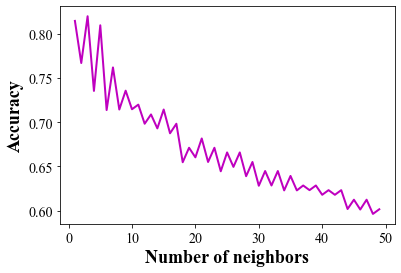

In [32]:
fig = plt.figure(1)
ax = plt.axes()

font = FontProperties()
font.set_name('Times New Roman')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

ax.set_xlabel('Number of neighbors', fontsize=18, fontdict=dict(weight='bold'))
ax.set_ylabel('Accuracy', fontsize=18, fontdict=dict(weight='bold'))

graph = ax.plot(k_range,df_mean, "m-", linewidth=2)